# MDI220
# Statistiques

# Mini-project 

## Votre nom: Mohamed Benyahia

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
from scipy.stats import norm, chi2, gaussian_kde

In [48]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [49]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [50]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [51]:
regions = list(df.region.unique())

In [52]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [53]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [54]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [55]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

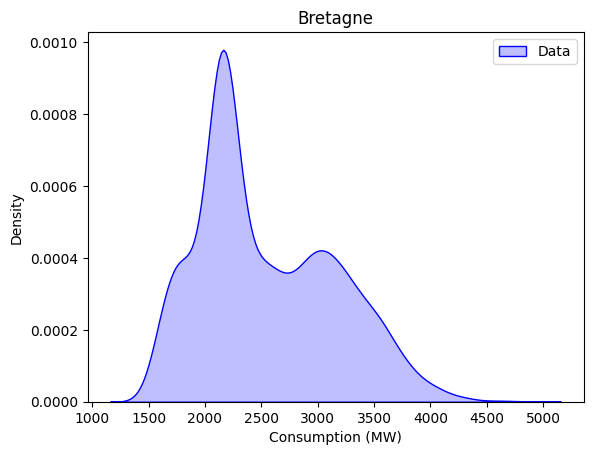

In [56]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse : $ b( \mu, \hat \mu)=  \frac 1 {n} \sum_{i=1}^n E(x_i) - \mu = \frac{n\mu}{n} - \mu = 0$  
$ b( \sigma^2, \hat{\sigma^2}) = \frac 1 {n-1}\sum_{i=1}^n E[(x_i - \hat \mu)^2] -\sigma^2$  
$ b(\sigma^2, \hat{\sigma^2} )= \frac 1 {n-1}\sum_{i=1}^n (E[x_i^2] -2 E[x_i \hat \mu ]+E[ \hat{\mu^2}]) -\sigma^2$

On sait que $E[x_i \hat \mu ] = \frac 1 n (\sum_{j=1, j\neq i}^n E(x_j)E(x_i)+E(x_i^2))$  
$E[x_i \hat \mu ] = \frac 1 n [ (n-1)\mu^2 + \sigma^2+ \mu^2]$  
$ E[x_i \hat \mu ] = \frac 1 n \sigma^2 + \mu^2$  
$ E[\hat{\mu^2} ] = \frac 1 {n^2} \sum_{i=1}^n \sum_{j=1}^n E(x_i x_j)= \frac 1 {n^2} \sum_{i=1}^n E(x_i^2)+ \frac 1 {n^2} \sum_{i=1}^n \sum_{j=1, j\neq i}^n E(x_i)E(x_j) $  
donc $ E[\hat{\mu^2} ] = \frac 1 {n^2} (n(\sigma^2+ \mu^2)+n(n-1)\mu^2)$  
donc $ E[\hat{\mu^2} ] = \frac 1 {n} \sigma^2 + \mu^2  $
donc $ b(\sigma^2, \hat{\sigma^2} )= \frac 1 {n-1} n(\sigma^2+ \mu^2-\frac 1 {n} \sigma^2 - \mu^2)-\sigma^2 $  
donc $ b(\sigma^2, \hat{\sigma^2} )= \sigma^2 - \sigma^2 =0 $ 



2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [57]:
cons = np.array(df_region["consumption"])
n= len(cons)
moyenne = sum(cons)/n
variance = sum((cons-moyenne)**2)/(n-1)
print(moyenne)
print(variance)


2546.536155666579
365956.01414481626


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [58]:
new_data= np.random.normal(moyenne,np.sqrt(variance),n)


4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

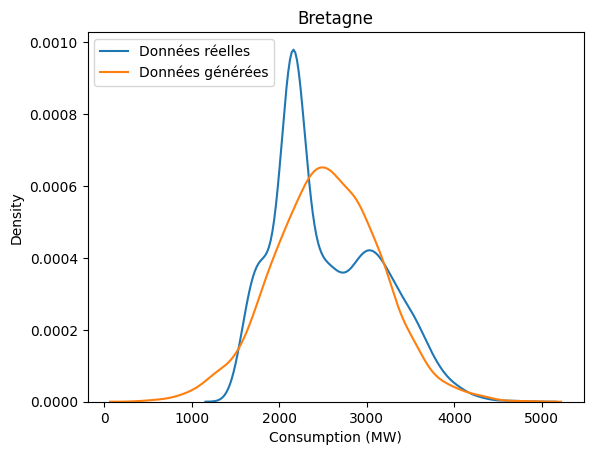

In [59]:

sns.kdeplot(cons, label="Données réelles")
sns.kdeplot(new_data,label="Données générées")
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend(loc="upper left")


5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

3214.1782077393077
167670.9009313411


Text(0.5, 1.0, 'Bretagne')

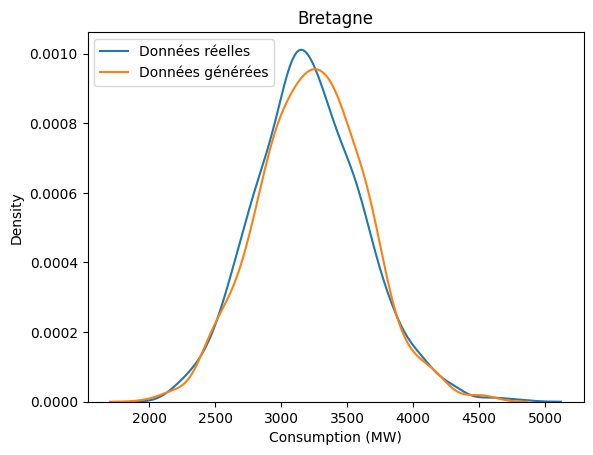

In [60]:
def getConsHiver(region):
    df_region=df[df.region==region]
    mask = (df_region['date'] >= '2013-01-01') & (df_region['date'] <='2013-03-21')
    sub_df = df_region.loc[mask]
    for i in range(2013,2023):
        mask = (df_region['date'] >= str(i)+'-12-22') & (df_region['date'] <=str(i+1)+'-03-21')
        df_temp = df_region.loc[mask]
        sub_df=pd.concat([sub_df,df_temp], ignore_index=True)
   
    consHiver=np.array(sub_df["consumption"])
    return consHiver

consHiver = getConsHiver("Bretagne")
nHiver= len(consHiver)
moyenneHiver = sum(consHiver)/nHiver
varianceHiver = sum((consHiver-moyenneHiver)**2)/(nHiver-1)

new_dataHiver= np.random.normal(moyenneHiver,np.sqrt(varianceHiver),nHiver)

print(moyenneHiver)
print(varianceHiver)


sns.kdeplot(consHiver,label="Données réelles")
sns.kdeplot(new_dataHiver,label="Données générées")
plt.legend(loc="upper left")
plt.xlabel("Consumption (MW)")
plt.title("Bretagne")

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

L'hypothèse gaussienne est plus appropriée dans le deuxième cas .

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Votre réponse : Puisque $|f(x) - g(x)| >=0$ pour $x \in R$ alors  $ d(f,g)>=0$     
Puisque $|f-g|$ est une fonction mesurable positive alors $d(f,g)=0 $ si et seulement si $|f-g|=0$ presque partout si et seulement si $f=g$ presque partout.  
Supposons que le support de f et g sont disjoints donc $d(f,g)=\frac{1}{2} \int_{supp(f)} |f(x)| \mathrm +\frac{1}{2} \int_{supp(g)} |g(x)| \mathrm   dx = \frac{1}{2} +\frac{1}{2}=1$  
Montrons la reciproque :   

On definit $\mu$ et $\nu$ tel que $f$ et $g$ soient respectivement les densites Radon-Nikodym de $\mu$ et $\nu$ par rapport a la mesure de Lebesgue.    
On definit $ ||\mu||= $ sup{$\sum_{i=1}^{n} |\mu (B_i)|$ pour $n \in N$ et $B_1,B_2,..,B_n \in B(R)$ disjoints et $\bigcup_{i=1}^{n} B_i$ C R}  

On a donc bien $||\mu - \nu || = \int |f(x) - g(x)| \mathrm dx $  
On a $2|\mu(A)-\nu(A)|=|\mu(A)-\nu(A)|+|\mu(A^c)-\nu(A^c)|<=||\mu-\nu||$ avec $A^c$ :complementaire de A pour $A\in B(R)$  
donc $||\mu-\nu||>=2 sup_{A \in B(R)}{|\mu(A)-\nu(A)|}$    
On a $||\mu - \nu || = \int_{R} |f(x) - g(x)| \mathrm dx = \int_{f>g} (f(x) - g(x)) \mathrm dx + \int_{f<g} (g(x) - f(x)) \mathrm dx= (\mu-\nu)({f>g}) + (\nu-\mu)({f<g}) = |(\mu-\nu)({f>g})|+|(\mu-\nu)({f<g})| <=2 sup_{A \in B(R)}{|\mu(A)-\nu(A)|}$   
donc $d(f,g)=\frac{1}{2} \int |f(x) - g(x)| \mathrm dx= sup_{A \in B(R)}{|\mu(A)-\nu(A)|}= |\mu(C)-\nu(C)|$  
On a pour X $\approx \mu$ and Y $\approx \nu$ On a $P(X\neq Y)>=P(X \in C,Y \in C^c)>=P(X \in C)-P(Y \in C)= \mu(C)-\nu(C)=d(f,g)$ donc $d(f,g)<=P(X \neq Y)<=1$ donc $d(f,g) \in [0,1]$ et si $d(f,g)=1$ alors $P(X \neq Y)=1$ donc f et g possèdent des supports disjoints . 




2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [61]:
kde_real = gaussian_kde(cons)
new_data= np.random.normal(moyenne,np.sqrt(variance),n)
kde_generated = gaussian_kde(new_data)
grid = np.linspace(min(min(cons),min(new_data)),max(max(cons),max(new_data)))

differenceAbs =np.abs(kde_real(grid)-kde_generated(grid))


dissimilarity = 0.5*np.trapz(np.array(differenceAbs))
print("La dissimilarité pour la région Bretagne vaut",dissimilarity)


La dissimilarité pour la région Bretagne vaut 0.001988046948318204


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [62]:
kderealH = gaussian_kde(consHiver)

new_dataHiver= np.random.normal(moyenneHiver,np.sqrt(varianceHiver),nHiver)
kde_generatedH = gaussian_kde(new_dataHiver)
gridH = np.linspace(min(min(consHiver),min(new_dataHiver)),max(max(consHiver),max(new_dataHiver)))


differenceAbsH =np.abs(kderealH(gridH)-kde_generatedH(gridH))


dissimilarityH = 0.5*np.trapz(np.array(differenceAbsH))
print("La dissimilarité pour la Bretagne en Hiver vaut ",dissimilarityH)

La dissimilarité pour la Bretagne en Hiver vaut  0.0007415829346574748


On remarque que la dissimilarite en Hiver est beaucoup plus faible donc notre conclusion de la partie A etait juste. 

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [63]:
mins=[]
dissimilarities=[]
dissimilaritiesH=[]
for region in regions :
    cons_reg=np.array(df[df.region==region]["consumption"])
    kde_real = gaussian_kde(cons_reg)
    moy_reg = sum(cons_reg)/len(cons_reg)
    var_reg = sum((cons_reg-moy_reg)**2)/(len(cons_reg)-1)
    new_data_reg= np.random.normal(moy_reg,np.sqrt(var_reg),len(cons_reg))
    kde_generated = gaussian_kde(new_data_reg)
    grid = np.linspace(min(min(cons_reg),min(new_data_reg)),max(max(cons_reg),max(new_data_reg)))
    differenceAbs =np.abs(kde_real(grid)-kde_generated(grid))
    dissimilarity = 0.5*np.trapz(np.array(differenceAbs))
    dissimilarities.append(dissimilarity)

 
    consH=getConsHiver(region)

    nH= len(consH)
    moyenneH = sum(consH)/nH
    varianceH = sum((consH-moyenneH)**2)/(nH-1)
        
    new_dataH= np.random.normal(moyenneH,np.sqrt(varianceH),nH)
    kderealH = gaussian_kde(consH)
    kde_generatedH = gaussian_kde(new_dataH)
    gridH = np.linspace(min(min(consH),min(new_dataH)),max(max(consH),max(new_dataH)))
    differenceAbsH =np.abs(kderealH(gridH)-kde_generatedH(gridH))
    dissimilarityH = 0.5*np.trapz(np.array(differenceAbsH))
    dissimilaritiesH.append(dissimilarityH)
  
     
        

DH={}
for i in range(len(regions)) :
    DH[dissimilaritiesH[i]]=regions[i]
D={}
for i in range(len(regions)) :
    D[dissimilarities[i]]=regions[i]
myData =  {'regions': list(D.values()),'dissimilarite': list(D.keys()), 'dissimilarite Hiver': list(DH.keys())}
df_dissim=pd.DataFrame(data=myData, index=list(range(len(regions))))

print(df_dissim)
                




    

                       regions  dissimilarite  dissimilarite Hiver
0         Auvergne-Rhône-Alpes       0.000729             0.000183
1      Bourgogne-Franche-Comté       0.001899             0.000911
2                     Bretagne       0.001806             0.000710
3          Centre-Val de Loire       0.002579             0.000828
4                    Grand Est       0.000737             0.000540
5              Hauts-de-France       0.000855             0.000241
6                    Normandie       0.001665             0.000821
7           Nouvelle-Aquitaine       0.001259             0.000495
8                    Occitanie       0.001637             0.000518
9             Pays de la Loire       0.001446             0.000464
10  Provence-Alpes-Côte d'Azur       0.001789             0.000557
11               Île-de-France       0.000674             0.000354


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

La région qui a le meilleur fit avec le modele gaussien en hiver est Auvergne-Rhone Alpes car c'est elle qui minimise la dissimilarite en Hiver.

6. Pour cette région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

Text(0.5, 1.0, 'Auvergne-Rhône-Alpes')

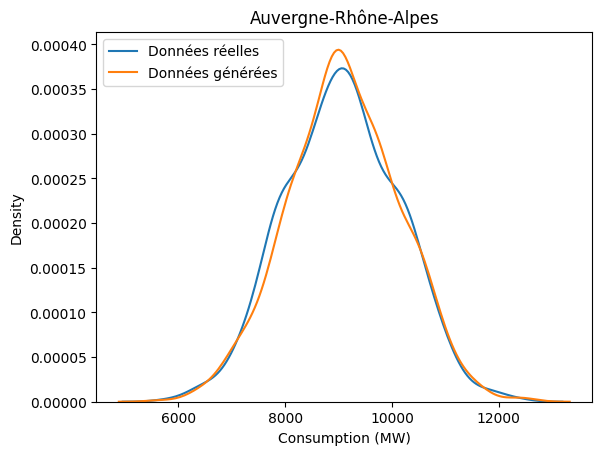

In [64]:
consH=getConsHiver("Auvergne-Rhône-Alpes")

nH= len(consH)
moyenneH = sum(consH)/nH
varianceH = sum((consH-moyenneH)**2)/(nH-1)
        
new_dataH= np.random.normal(moyenneH,np.sqrt(varianceH),nH)


sns.kdeplot(consH,label="Données réelles")
sns.kdeplot(new_dataH,label="Données générées")
plt.legend(loc="upper left")
plt.xlabel("Consumption (MW)")
plt.title("Auvergne-Rhône-Alpes")
    

## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$MW et l'écart-type $\sigma_0=500$MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse :

$p(\mu |x)= \frac{p(\mu)p(x|\mu)}{m(x)} \propto \exp(\frac{-(\mu -\mu_0)^2}{2 \sigma_0^2}) \exp(\sum_{i=1}^n \frac{-(x_i-\mu)^2)}{2 \sigma^2}) \propto \exp(\frac{-(\mu^2 +\mu_0^2-2 \mu \mu_0)}{2 \sigma_0^2}) \exp(\sum_{i=1}^n \frac{-(x_i^2+\mu^2-2 x_i \mu)}{2 \sigma^2}) \propto \exp(\frac{-(\mu^2 +\mu_0^2-2 \mu \mu_0)}{2 \sigma_0^2}) \exp(\frac{-\sum_{i=1}^n x_i^2 -n\mu^2+2 \mu \sum_{i=1}^n x_i )}{2 \sigma^2}) \propto \exp(-\frac{\mu^2 \frac{n \sigma_0^2 + \sigma^2}{\sigma^2 \sigma_0^2} - 2 \mu (\frac{\sum_{i=1}^n x_i}{\sigma^2}+ \frac{\mu_0 }{\sigma_0^2})}{2}) \propto \exp(-\frac{\mu^2  - 2 \mu \frac{\sigma^2 \sigma_0^2}{n \sigma_0^2 + \sigma^2} (\frac{\sum_{i=1}^n x_i}{\sigma^2}+ \frac{\mu_0 }{\sigma_0^2})}{2 \frac{\sigma^2 \sigma_0^2}{n \sigma_0^2 + \sigma^2}}) \propto  \exp(-\frac{\mu^2  - 2 \mu \frac{\sigma_0^2 \sum_{i=1}^n x_i+ \mu_0 \sigma^2  }{n \sigma_0^2 + \sigma^2} }{2 \frac{\sigma^2 \sigma_0^2}{n \sigma_0^2 + \sigma^2}})  $  
Soit T(x)= $\sum_{i=1}^n x_i$   
donc $p(\mu |x) \propto \exp(-\frac{\mu^2  - 2 \mu \frac{\sigma_0^2 T(x)+ \mu_0 \sigma^2  }{n \sigma_0^2 + \sigma^2} }{2 \frac{\sigma^2 \sigma_0^2}{n \sigma_0^2 + \sigma^2}}) \propto $ N $(\frac{\sigma_0^2 T(x)+ \mu_0 \sigma^2  }{n \sigma_0^2 + \sigma^2},\frac{\sigma^2 \sigma_0^2}{n \sigma_0^2 + \sigma^2} ) $



2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [65]:
df_region=df[df.region=="Bretagne"]
mask = (df_region['date'] >= '2013-01-01') & (df_region['date'] <='2013-03-21')
sub_df = df_region.loc[mask]
for i in range(2013,2023):
    mask = (df_region['date'] >= str(i)+'-12-22') & (df_region['date'] <=str(i+1)+'-03-21')
    df_temp = df_region.loc[mask]
    sub_df=pd.concat([sub_df,df_temp], ignore_index=True)
def get_df_HYear(i):
    year_df= sub_df.loc[(sub_df['date']>=str(i)+'-01-01') & (sub_df['date']<=str(i)+'-12-31')]
    return year_df
meanPostYears= []
varPostYears=[]

mu0=3500
sigma0=500
sigma=400
def getPostParameters(cons_yearH):
    meanPostYear=(sigma0**2 * sum(cons_yearH)+mu0 *(sigma**2))/(len(cons_yearH)*sigma0**2+sigma**2)
    varPostYear = ((sigma**2) * (sigma0**2))/(len(cons_yearH)*sigma0**2+sigma**2)
    return [meanPostYear,varPostYear]

for i in range(2013,2024):
    year_df= get_df_HYear(i)
    cons_yearH= year_df["consumption"]
    
    meanPostYears.append(getPostParameters(cons_yearH)[0])
    varPostYears.append(getPostParameters(cons_yearH)[1])
dataH =  {'annee': list(range(2013,2024)), 'Post moyenne Hiver': meanPostYears,'Post variance Hiver':varPostYears}
df_postParameters=pd.DataFrame(data=dataH, index=list(range(11)))
print(df_postParameters)



    

    

    annee  Post moyenne Hiver  Post variance Hiver
0    2013         3343.413504          1765.225066
1    2014         3118.424537          1765.225066
2    2015         3167.398500          1765.225066
3    2016         3207.507639          1745.962462
4    2017         3251.224625          1765.225066
5    2018         3315.081642          1765.225066
6    2019         3195.200794          1765.225066
7    2020         3145.504147          1745.962462
8    2021         3341.946161          1765.225066
9    2022         3165.081642          1765.225066
10   2023         3117.547123          1984.126984


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

Text(0.5, 1.0, 'Bretagne')

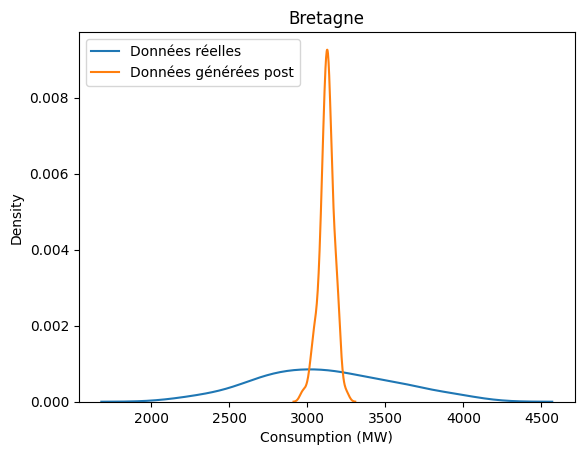

In [66]:

new_dataPost= np.random.normal(df_postParameters["Post moyenne Hiver"][10],np.sqrt(df_postParameters["Post variance Hiver"][10]),len(get_df_HYear(2023)["consumption"]))

sns.kdeplot(get_df_HYear(2023)["consumption"],label="Données réelles")
sns.kdeplot(new_dataPost,label="Données générées post")
plt.legend(loc="upper left")
plt.xlabel("Consumption (MW)")
plt.title("Bretagne")


4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Votre réponse : Le modele de la loi a posteriori nous permet d'avoir plus d'informations c'est pourquoi la courbe est plus serrée. 

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Soit $H_0= $ { $\sigma=\sigma_{0}= 400$ } vs $H_1 = $ {$\sigma=\sigma_{1} = 500$} 
Soit $X_1$, $X_2$, ... , $X_n$ i.i.d suivant une loi normale de parametres $ \mu =3200$ et $ \sigma^{2}$     
On applique Neyman-Pearson   


Rapport de vraisemblance $Z(x)= \frac{p_1(x)}{p_0(x)} \propto \exp(\frac{(\sum_{i=1}^n (x_i -\mu)^2) \frac{\sigma_{1}^{2}-\sigma_{0}^2}{\sigma_{1}^{2}\sigma_{0}^{2}}}{2})$

Le test de niveau $\alpha$ est defini comme $\delta(x) =\mathbb{1}_{Z(x)>c'} = \mathbb{1}_{W(x)>c} $ avec $W(x)= \sum_{i=1}^n (x_i -\mu)^2$  

On a $ P_{\sigma_{0}}(W(x)>c)= \alpha$ donc $P_{\sigma_{0}}(W(x)/\sigma_{0}^2>c/\sigma_{0}^2)= \alpha$  
donc $ c = \sigma_{0}^2 q_{1-\alpha}$ avec $q_{1-\alpha}$ quantile de loi chi deux centree avec n degres de liberte 





Votre réponse :

2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [67]:
cons2023= get_df_HYear(2023)["consumption"]
mu =np.array([3200]*len(cons2023))
W = sum((np.array(get_df_HYear(2023)["consumption"])-mu)**2)
q= chi2.ppf(0.99,len(cons2023))

c=(400**2)*q

if W<=c:
    print("On accepte l'hypothese H0 ecart-type egal a 400")
else :
    print("On accepte l'hypothese H1 ecart-type egal a 500")


On accepte l'hypothese H0 ecart-type egal a 400


## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

<Axes: >

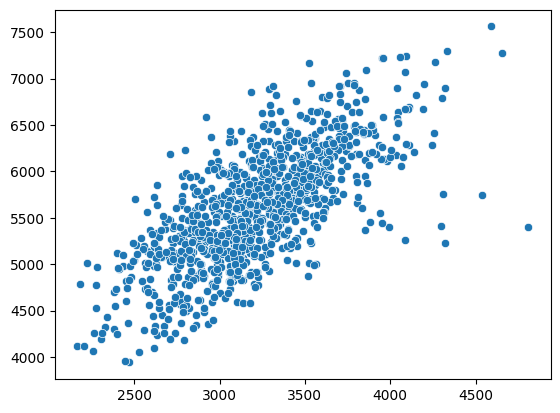

In [68]:
consH_Bret=getConsHiver("Bretagne")
consH_Prov=getConsHiver("Provence-Alpes-Côte d'Azur")
sns.scatterplot(x=consH_Bret,y=consH_Prov)






2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Votre réponse : La consommation dans les 2 régions est dépendante puisque d'apres le graphe on voit bien que les valeurs prises sont liées entre elles.

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Votre réponse : Soit X la consommation dans la Bretagne en Hiver et Y la consommation dans la Provence-Alpes-Côte d'Azur en Hiver.   
L'hypothese a tester est l'independance entre X et Y     

Soient $X_1, X_2, ... , X_n $ iid et $Y_1, Y_2,..,Y_n$ iid   
On choisit deux partitions $ A_1,A_2,...,A_K$ et $B_1, B_2,...,B_L$ des espaces de valeurs de X et Y.

$ T(X,Y) = \sum_{i}\sum_{j} \frac{(N_{i,j}-\frac{N_i N_j}{n})^2 }{\frac{N_i N_j}{n}}$ avec $N_{i,j}=\sum_{t=1}^{n} \mathbb1_{X_t \in A_i, Y_t \in B_j}$ et $N_i= \sum_{t=1}^{n} \mathbb1_{X_t \in A_i} $ et $N_j= \sum_{t=1}^{n} \mathbb1_{Y_t \in B_j}$   
$T(X,Y)$ suit une loi de chi-deux ((K-1)(L-1)). Le test de niveau $\alpha$ est donc : $\delta(x,y)= \mathbb1_{T(x,y)>c}$ avec $c = Q(1-\alpha)$ Q est le quantile de la loi de chi-deux. 

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [69]:
n=len(consH_Bret)
minB= min(consH_Bret)
maxB=max(consH_Bret)

medianB = (maxB+minB)/2

minP= min(consH_Prov)
maxP=max(consH_Prov)

medianP = (maxP+minP)/2

N0_B = sum([1 if c>=minB and c<medianB else 0 for c in consH_Bret ])
N1_B= sum([1 if c>=medianB and c<=maxB else 0 for c in consH_Bret ])

N0_P = sum([1 if c>=minP and c<medianP else 0 for c in consH_Prov ])
N1_P= sum([1 if c>=medianP and c<=maxP else 0 for c in consH_Prov ])

N00 = sum([1 if consH_Bret[i]>=minB and consH_Bret[i]<medianB and consH_Prov[i]>=minP and consH_Prov[i]<medianP else 0 for i in range(n) ])
N01 = sum([1 if consH_Bret[i]>=minB and consH_Bret[i]<medianB and consH_Prov[i]>=medianP and consH_Prov[i]<=maxP else 0 for i in range(n) ])
N10 = sum([1 if consH_Bret[i]>=medianP and consH_Bret[i]<maxB and consH_Prov[i]>=minP and consH_Prov[i]<medianP else 0 for i in range(n) ])
N11 = sum([1 if consH_Bret[i]>=medianP and consH_Bret[i]<maxB and consH_Prov[i]>=medianP and consH_Prov[i]<maxP else 0 for i in range(n) ])

T= (N00 -N0_B*N0_P/n)**2 /(N0_B*N0_P/n)+(N01 -N0_B*N1_P/n)**2 /(N0_B*N1_P/n)+(N10 -N1_B*N0_P/n)**2 /(N1_B*N0_P/n)+(N11 -N1_B*N1_P/n)**2 /(N1_B*N1_P/n)
c= chi2.ppf(0.99,9)

if T>=c:
    print("On rejette l'hypothese d'independance.")
else:
    print("On accepte l'hypothese d'independance.")

On rejette l'hypothese d'independance.


## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [70]:
consHiver = getConsHiver("Bretagne")
nHiver= len(consHiver)
moyenneHiver = sum(consHiver)/nHiver

varianceHiver = sum((consHiver-moyenneHiver)**2)/(nHiver-1)
q=norm.ppf(1-0.05/2)
a=moyenneHiver-q*np.sqrt(varianceHiver)/np.sqrt(nHiver)
b=moyenneHiver+q*np.sqrt(varianceHiver)/np.sqrt(nHiver)
print("["+str(a)+','+str(b)+"]")

[3188.567522649083,3239.7888928295324]


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [71]:
from scipy.stats import t
n2023=len(cons2023)
moyenne2023 = sum(cons2023)/n2023

variance2023 = sum((cons2023-moyenne2023)**2)/(n2023-1)
q=t.ppf(1-0.05/2,n2023-1)
a=moyenne2023-q*np.sqrt(variance2023)/np.sqrt(n2023)
b=moyenne2023+q*np.sqrt(variance2023)/np.sqrt(n2023)
print("["+str(a)+','+str(b)+"]")

[3020.7549470871563,3208.220052912844]


3100 appartient a l'intervalle de confiance   
donc on accepte l'hypothese. 
